In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#load the dataset(Ihave collected this dataset from kaggle)
data = pd.read_csv("customer_purchase_data.csv")

In [3]:
#checking the data
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [4]:
# Check the shape of the dataset
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (1500, 9)


In [5]:
# Encoding categorical variables using one-hot encoder beacuse we use nominal dataset where Categories have no natural order or ranking
data = pd.get_dummies(data, columns=['ProductCategory'],prefix = 'product')


In [6]:
print(data.isnull().sum())

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
product_0             0
product_1             0
product_2             0
product_3             0
product_4             0
dtype: int64


In [7]:
#separate the data into features and target variables
X = data.drop('PurchaseStatus', axis=1)
y = data['PurchaseStatus']

In [8]:
#Scaling gthe features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
#Split the data into testing and training
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Models - Random forest
rf_model = RandomForestClassifier(random_state=42).fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)


In [11]:
#Evaluvate the model
accuracy_rf=accuracy_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
f1_rf=f1_score(y_test,y_pred_rf)
cm_rf=confusion_matrix(y_test,y_pred_rf)



Random Forest:
 Accuracy: 0.9566666666666667
 Precision: 0.9914529914529915
 Recall: 0.90625
 F1 Score: 0.9469387755102041


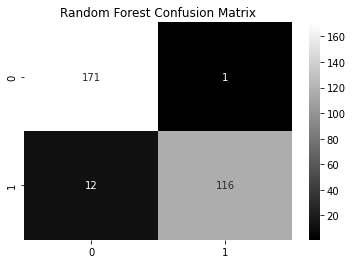

In [12]:
#Print the results
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='gray')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [13]:
#Lets try with decison tree model
dt_model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [14]:
#evaluvate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

Decision Tree Classifier:
 Accuracy: 0.9033333333333333
 Precision: 0.9304347826086956
 Recall: 0.8359375
 F1 Score: 0.8806584362139918


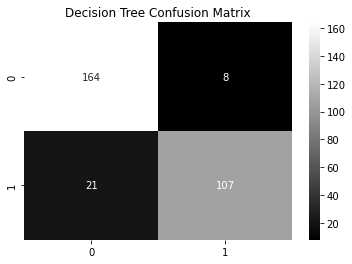

In [15]:
#print the results
print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='gray')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [16]:
#Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

In [17]:
#evaluvate the model
accuracy_dt = accuracy_score(y_test, y_pred_nb)
precision_dt = precision_score(y_test, y_pred_nb)
recall_dt = recall_score(y_test, y_pred_nb)
f1_dt = f1_score(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_nb)

Naive Bayes:
 Accuracy: 0.8366666666666667
 Precision: 0.898989898989899
 Recall: 0.6953125
 F1 Score: 0.7841409691629956


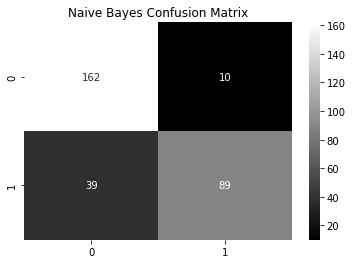

In [18]:
#print the results
print(f'Naive Bayes:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='gray')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [19]:
#Support vector machine
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

In [20]:
#evaluvate the model
accuracy_dt = accuracy_score(y_test, y_pred_svm)
precision_dt = precision_score(y_test, y_pred_svm)
recall_dt = recall_score(y_test, y_pred_svm)
f1_dt = f1_score(y_test, y_pred_svm)
cm_dt = confusion_matrix(y_test, y_pred_svm)

Support Vector Machine:
 Accuracy: 0.85
 Precision: 0.8952380952380953
 Recall: 0.734375
 F1 Score: 0.8068669527896996


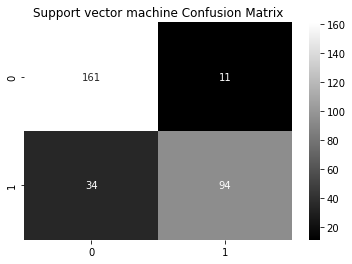

In [21]:
#print the results
print(f'Support Vector Machine:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='gray')
plt.title('Support vector machine Confusion Matrix')
plt.show()

In [32]:
#Logisctic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [23]:
#evaluvate the model
accuracy_dt = accuracy_score(y_test, y_pred_lr)
precision_dt = precision_score(y_test, y_pred_lr)
recall_dt = recall_score(y_test, y_pred_lr)
f1_dt = f1_score(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_lr)

Logistic regression:
 Accuracy: 0.8366666666666667
 Precision: 0.8761904761904762
 Recall: 0.71875
 F1 Score: 0.7896995708154506


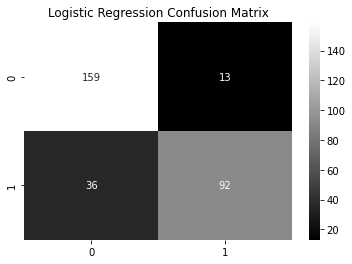

In [24]:
#print the results
print(f'Logistic regression:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='gray')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [25]:
#Kneihbours Classifier
Knc_model = KNeighborsClassifier()
Knc_model.fit(x_train, y_train)
y_pred_Knc = Knc_model.predict(x_test)

In [26]:
#evaluvate the model
accuracy_dt = accuracy_score(y_test, y_pred_Knc)
precision_dt = precision_score(y_test, y_pred_Knc)
recall_dt = recall_score(y_test, y_pred_Knc)
f1_dt = f1_score(y_test, y_pred_Knc)
cm_dt = confusion_matrix(y_test, y_pred_Knc)

Kneihbours Classifier:
 Accuracy: 0.7966666666666666
 Precision: 0.8018018018018018
 Recall: 0.6953125
 F1 Score: 0.7447698744769874


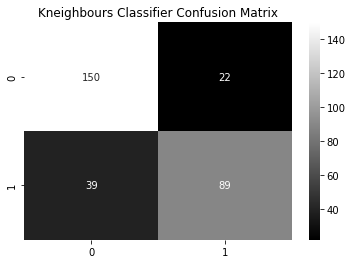

In [27]:
#print the results
print(f'Kneihbours Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='gray')
plt.title('Kneighbours Classifier Confusion Matrix')
plt.show()

In [28]:
#XGB CLASSIFIER
xgb_model = XGBClassifier().fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

In [29]:
#evaluvate the model
accuracy_dt = accuracy_score(y_test, y_pred_xgb)
precision_dt = precision_score(y_test, y_pred_xgb)
recall_dt = recall_score(y_test, y_pred_xgb)
f1_dt = f1_score(y_test, y_pred_xgb)
cm_dt = confusion_matrix(y_test, y_pred_xgb)

XGB Classifier:
 Accuracy: 0.95
 Precision: 0.991304347826087
 Recall: 0.890625
 F1 Score: 0.9382716049382716


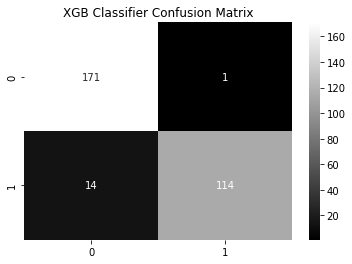

In [30]:
#print the results
print(f'XGB Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='gray')
plt.title('XGB Classifier Confusion Matrix')
plt.show()